In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import glob
import cv2
%matplotlib inline

### load data

In [2]:
test_data=pd.read_csv('test.txt',header=None,sep=' ',names=['picture','label'])
train_data=pd.read_csv('train.txt',header=None,sep=' ',names=['picture','label'])
valid_data=pd.read_csv('valid.txt',header=None,sep=' ',names=['picture','label'])

test_data['dir']=['preprocessed/'+'test/'+pic for pic in test_data['picture']]
train_data['dir']=['preprocessed/'+'train/'+pic for pic in train_data['picture']]
valid_data['dir']=['preprocessed/'+'valid/'+pic for pic in valid_data['picture']]

total_set = pd.concat([test_data,train_data,valid_data],ignore_index=True)
iid_total_set = pd.concat([total_set[total_set['label']==i] for i in range(5)]).reset_index(drop=True)
random_set = iid_total_set.reindex(np.random.permutation(iid_total_set.index))
new_label = [str(i==0) for i in random_set['label'].values] #true means healthy
random_set['new_label']=new_label
## settings####################################################################################
batch_SIZE=300
img_SIZE = 224

val_len = 2522
val_set = random_set[:val_len]
train_set = random_set[val_len:]

Text(0, 0.5, 'Sample counts')

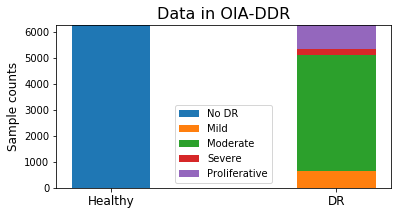

In [3]:
counts = iid_total_set['label'].value_counts()
count_set = []
for i in range(5):
    if i==0:
        a = [counts[i],0]
    else:
        a = [0,counts[i]]
    count_set.append(a)
labels = ['Healthy','DR']
mylabels = ['No DR','Mild','Moderate','Severe','Proliferative']
    
bottom_list = [0,0]
for i in range(5):
    plt.bar(labels,count_set[i],width = 0.35,label=mylabels[i],bottom=bottom_list)
    bottom_list[0] += count_set[i][0]
    bottom_list[1] += count_set[i][1]

plt.legend()
plt.gcf().set_size_inches(6, 3)
plt.title('Data in OIA-DDR', fontsize=16)
plt.xticks(labels, labels, fontsize=12)
plt.ylabel('Sample counts', fontsize=12)

In [4]:
# worker_nb = 3
# worker_data = int(len(train_set)/worker_nb)

In [5]:
# worker1 = train_set[0:worker_data]
# worker2 = train_set[worker_data:worker_data*2]
# worker3 = train_set[worker_data*2:worker_data*3]

In [6]:
# worker1.to_pickle('assign_iid/worker1.pkl')
# worker2.to_pickle('assign_iid/worker2.pkl')
# worker3.to_pickle('assign_iid/worker3.pkl')
# val_set.to_pickle('assign_iid/val_set.pkl')
# train_set.to_pickle('assign_iid/train_set.pkl')

In [7]:
# pd.read_pickle('assign_iid/worker3.pkl').hist()

In [8]:
worker1 = pd.read_pickle('assign_iid/worker1.pkl')
worker2 = pd.read_pickle('assign_iid/worker2.pkl')
worker3 = pd.read_pickle('assign_iid/worker3.pkl')

Text(0, 0.5, 'Sample counts')

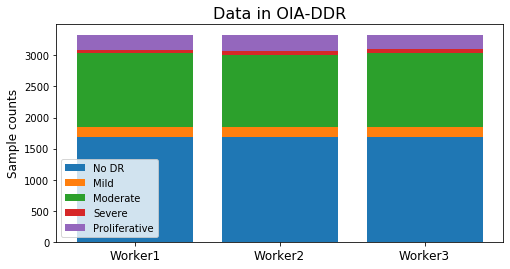

In [9]:
worker_counts = [worker1['label'].value_counts(), worker2['label'].value_counts(),worker3['label'].value_counts()]
count_set = []
for i in range(5):
    workc = []
    for j in worker_counts:
        workc.append(j[i])
    count_set.append(workc)


labels = ['Worker1','Worker2','Worker3']
mylabels = ['No DR','Mild','Moderate','Severe','Proliferative']
    
bottom_list = [0,0,0]
for i in range(5):
    plt.bar(labels,count_set[i],label=mylabels[i],bottom=bottom_list)
    bottom_list[0] += count_set[i][0]
    bottom_list[1] += count_set[i][1]
    bottom_list[2] += count_set[i][2]

plt.legend()
plt.gcf().set_size_inches(8, 4)
plt.title('Data in OIA-DDR', fontsize=16)
plt.xticks(labels, labels, fontsize=12)
plt.ylabel('Sample counts', fontsize=12)